# Shortest Path using BFS

This notebook shows how BFS can be used to find the shortest path between two nodes in an unweighted graph.

In [1]:
# Function to compute shortest path using BFS
from collections import deque

def shortest_path(graph, start, target):
    visited = set()
    queue = deque([(start, [start])])  # store (current_node, path_so_far)

    while queue:
        node, path = queue.popleft()
        if node == target:
            return path
        if node not in visited:
            visited.add(node)
            for neighbor in graph[node]:
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))
    return None

In [2]:
# Example graph for testing
graph_links = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

start_node = 'A'
end_node = 'F'
path_result = shortest_path(graph_links, start_node, end_node)

print(f"Shortest path from {start_node} to {end_node}: {path_result}")

Shortest path from A to F: ['A', 'C', 'F']


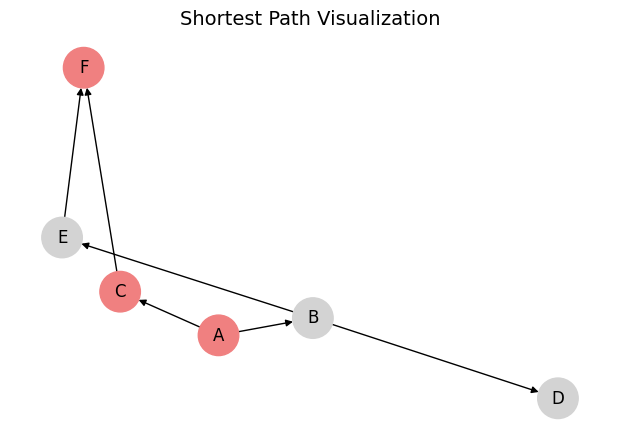

In [3]:
# Visualization of shortest path
import networkx as nx
import matplotlib.pyplot as plt

def visualize_path(graph, path):
    G = nx.DiGraph()
    for node, neighbors in graph.items():
        for n in neighbors:
            G.add_edge(node, n)

    colors = []
    for node in G.nodes():
        if path and node in path:
            colors.append('lightcoral')
        else:
            colors.append('lightgray')

    plt.figure(figsize=(6,4))
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=850, node_color=colors, font_size=12, font_color='black', edge_color='black')
    plt.title("Shortest Path Visualization", fontsize=14)
    plt.show()

visualize_path(graph_links, path_result)